In [87]:
#import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import errno
import numpy as np
import sys
from PIL import *
import PIL.Image

In [88]:
#initialize empty arrays that will carry images and their corresponding labels
c = 0
X,y = [],[]

In [89]:
#rescaling given image between user defined min-max
def normalize (X , low , high , dtype = None ):
    X = np.asarray(X)
    minX , maxX = np.min (X ) , np.max (X)
    # normalize to [0...1].
    X = X - float ( minX )
    X = X / float (( maxX - minX ) )
    # scale to [ low ... high ].
    X = X * ( high - low )
    X = X + low
    if dtype is None :
        return np . asarray (X)
    return np . asarray (X , dtype = dtype )

In [90]:
#calculating L2 norm between two images
def calc_dist(p,q):
    p = np.asarray(p).reshape(-1,1)
    q = np.asarray(q).reshape(-1,1)
    return np.sqrt(np.sum(np.power(( p - q),2)))

In [91]:
#code block to load images from different directories
sz = None
path = r'C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1'
for (dirname, dirnames, filenames) in os.walk(path , topdown=True):
    for subdirname in dirnames :
        subject_path = os.path.join(dirname,subdirname)
        print(subject_path)
        for filename in os.listdir(subject_path):
            try:
                im = Image.open(os.path.join(subject_path,filename))
                im = im.convert("L")
                if (sz is not None) :
                    im = im.resize(sz , Image.ANTIALIAS)
                X.append( np.asarray(im, dtype = 'int16' ) )
                y.append(c)
            except IOError :
                #print("I/O error ({0}) : {1}".format(errno,strerror))
                print("I/O error ({0})".format(errno))
            except :
                print(" Unexpected error :", sys.exc_info()[0])
                raise
        c = c + 1         

C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\.ipynb_checkpoints
I/O error (<module 'errno' (built-in)>)
I/O error (<module 'errno' (built-in)>)
I/O error (<module 'errno' (built-in)>)
I/O error (<module 'errno' (built-in)>)
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\1
I/O error (<module 'errno' (built-in)>)
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\10
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\11
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\12
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\13
C:\Users\admin\Documents\Computer Vision Projects\CH5019 Project\Term project 2020\Dataset_Question1\14
C:\Users\admin\Documents\Computer Vision Projects\CH5019 

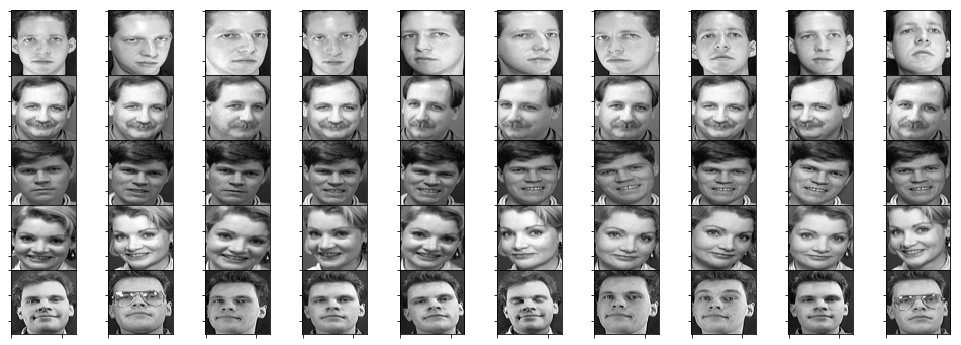

In [129]:
#take a look at the dataset of the first five subjects
dataset = X
fig=plt.figure(figsize=(20,5))
columns = 10 
rows = 5 
gs1 = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)
for i in range(0, columns*rows):
    img = dataset[i]
    ax0 = plt.subplot(gs1[i])
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax0.get_yticklabels(), visible=False)
    plt.imshow(img, cmap = 'gray')
fig.savefig('original_images.png')
plt.show()

In [93]:
m = X[0].shape[0]
n = X[0].shape[1]
N = len(X)
M = m*n
print('Shape of each image is', (m,n))
print('Total number of images in dataset', N)
print('Total number of images per subject in dataset', int(N/15))
print('Size of each image is',M)

Shape of each image is (64, 64)
Total number of images in dataset 150
Total number of images per subject in dataset 10
Size of each image is 4096


A_K will be a list containing the mean subtracted image matrix for each of the subjects

In [94]:
A_K = [] 
mean_K = []
for i in range(15):
    mat_temp = np.empty((X[0].size , 0))
    for j in range(10):
        mat_temp = np.hstack((mat_temp, np.asarray(normalize(X[i*10 + j],0,1)).reshape(-1,1))) #
    mean = np.reshape(mat_temp.mean(axis = 1),(M,1))
    mat_temp = mat_temp - mean
    A_K.append(mat_temp)
    mean_K.append(mean)

Displaying first 50 mean subtracted images

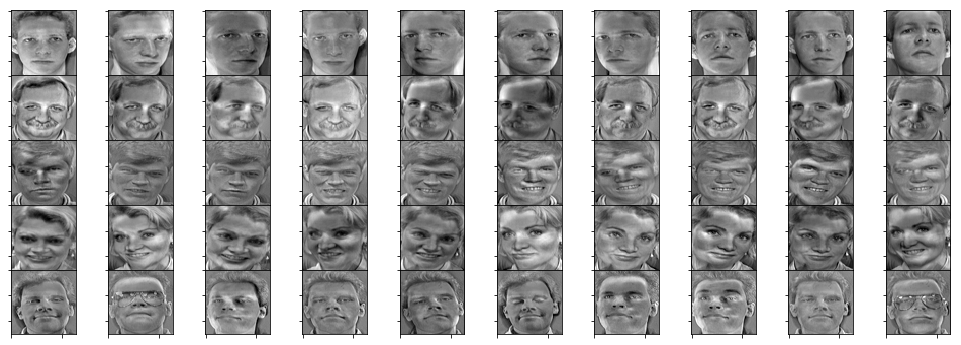

In [128]:
#take a look at the dataset of the first five subjects
mean_sub_imgs = []
subjects = 5
samples = 10

for i in range(subjects):
    for j in range(samples):
        mean_sub_imgs.append(np.reshape(A_K[i][:,j],X[0].shape))

dataset = mean_sub_imgs
fig=plt.figure(figsize=(20,5))

rows = subjects
columns = samples

gs1 = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)
for i in range(0, columns*rows):
    img = dataset[i]
    ax0 = plt.subplot(gs1[i])
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax0.get_yticklabels(), visible=False)
    plt.imshow(img, cmap = 'gray')
fig.savefig('meansub_images.png')
plt.show()

R_K will be a list containing the representative images for each of the subjects

In [96]:
#computing the representative images
R_K = []

for i in range(len(A_K)):
    C = A_K[i]
    u, s, vh = np.linalg.svd(C)
    eigenvectors_sorted = u[:,np.argsort(-s)]
    eigenfaces = eigenvectors_sorted[:,:1]
    eigenfaces = eigenfaces + mean_K[i]
    R_K.append(np.reshape(eigenfaces,X[0].shape))

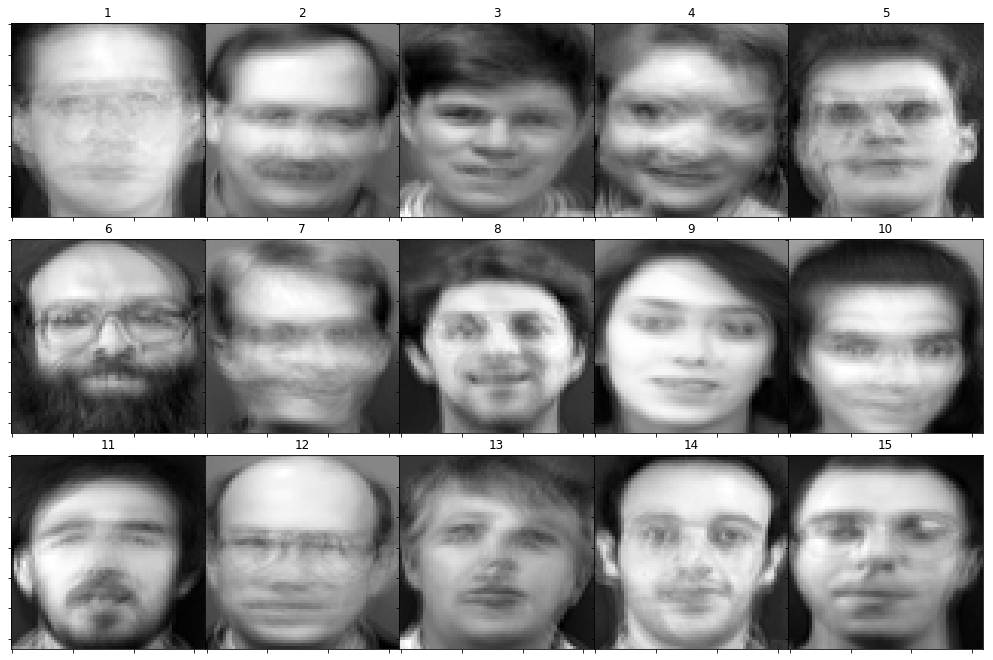

In [127]:
#take a look at the representative images for each subject
labels = np.arange(1,16)
dataset = R_K
fig=plt.figure(figsize=(20,10))
columns = 5
rows = 3
gs1 = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)
for i in range(0, columns*rows):
    img = dataset[i]
    ax0 = plt.subplot(gs1[i])
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax0.get_yticklabels(), visible=False)
    plt.title(str(labels[i]))
    plt.imshow(img, cmap = 'gray')
fig.savefig('rep_images.png')
plt.show()

In [115]:
#finding predictions on test data
X_test = X
y_test = y

predictions = []

for i in range(len(X_test)):
    distances = []
    for j in range(len(R_K)):
        distances.append(calc_dist(normalize(X_test[i],0,1),R_K[j]))

    euc_dist = np.asarray(distances)
    order = np.argmin(euc_dist)
    predictions.append(labels[order])

In [116]:
#calculating accuracy of the model
correct_preds = 0
total_samples = len(y_test)
for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        correct_preds += 1

print(correct_preds,'out of the',total_samples,'samples have been correctly identified')
print('Accuracy of the face recognition algorithm is: ',round((correct_preds/total_samples)*100,2),'%')

148 out of the 150 samples have been correctly identified
Accuracy of the face recognition algorithm is:  98.67 %


In [133]:
#testing model on a small dataset
X_test = [X[12],X[33],X[78],X[44],X[138]]
y_test = [y[12],y[33],y[78],y[44],y[138]]

predictions = []

for i in range(len(X_test)):
    distances = []
    for j in range(len(R_K)):
        distances.append(calc_dist(normalize(X_test[i],0,1),R_K[j]))

    euc_dist = np.asarray(distances)
    order = np.argmin(euc_dist)
    predictions.append(R_K[order])

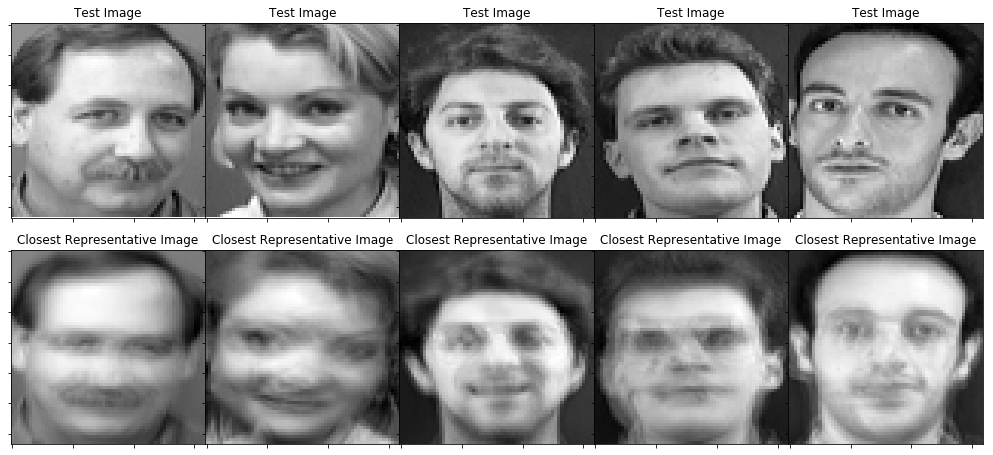

In [145]:
labels = np.arange(1,16)
dataset = X_test
fig=plt.figure(figsize=(20,7))
columns = 5
rows = 2
gs1 = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)
for i in range(0, columns*rows):
    ax0 = plt.subplot(gs1[i])
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax0.get_yticklabels(), visible=False)
    if i < columns :
        img = dataset[i]
        plt.title('Test Image')
    else:
        img = predictions[i-columns]
        plt.title('Closest Representative Image')
    plt.imshow(img, cmap = 'gray')
fig.savefig('test_images.png')
plt.show()